In [90]:
### Importing packages 

import numpy as np
import matplotlib.pyplot as plt
import cPickle as p
import glob
import os
import matplotlib.animation as animation


In [103]:
### Size of the images

plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.size']=20
plt.rcParams['figure.dpi']=200

In [4]:
### Creating a list with all the data files in it

List = glob.glob(os.path.join('./data/', '*.txt'))

In [24]:
List.sort()

In [25]:
### Set the file name to a variable

textName=List[300]

In [26]:
print len(textName)

36


In [27]:
print textName.replace('.txt','')

./data/R8_8pc_metal.0300.scal0.p


In [28]:
pickleName = textName.replace('.txt','')
print pickleName

./data/R8_8pc_metal.0300.scal0.p


In [29]:
### Loading data from a specific file

Z = p.load(open(pickleName))

Zxy_data = Z['z']["data"]
Zxy_bounds = Z['z']["bounds"]
Nx,Ny = Zxy_data.shape

tp_2d = np.loadtxt(textName)

In [11]:
print Z.keys()
Z['time']

['y', 'x', 'z', 'time']


array(52.80205109)

In [12]:
Zmean = Zxy_data.mean()
Zstd = Zxy_data.std()

In [13]:
Z_Fluct = (Zxy_data-Zmean)/Zstd

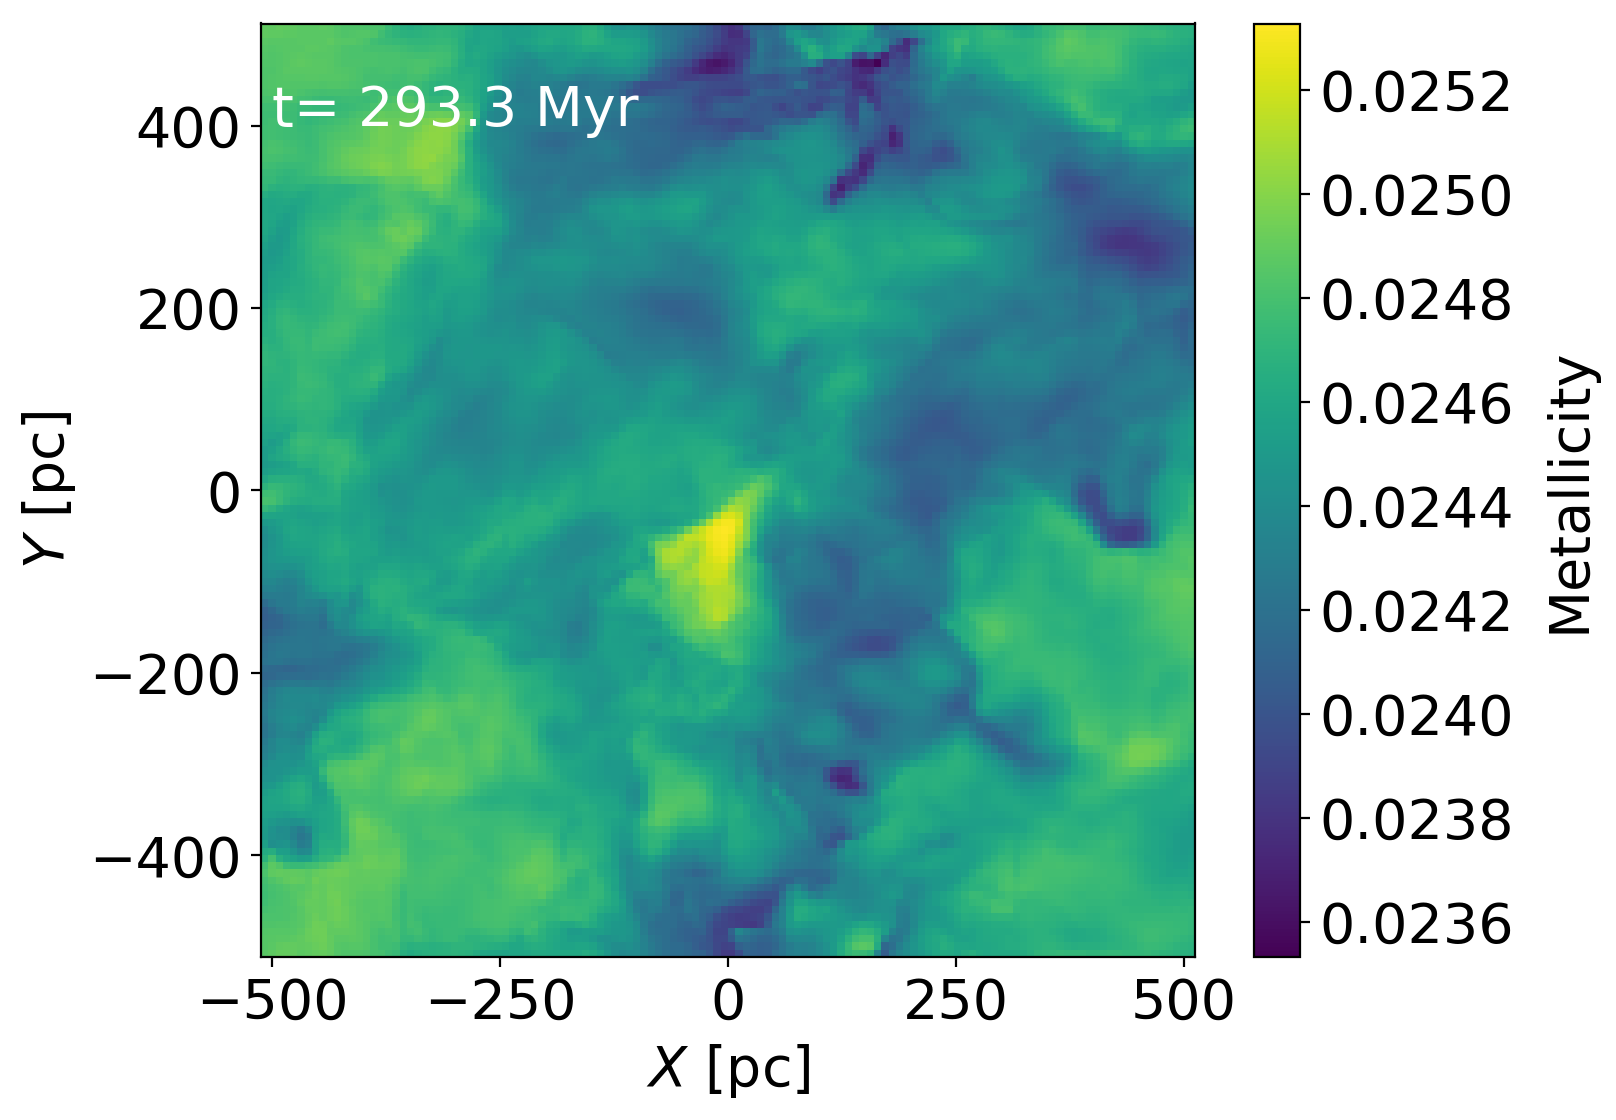

In [37]:
### Plotting Gas plot

###plt.subplot(121)
plt.figure(figsize = (8,6))
plt.text(-500,400,'{} {} {}'.format('t=',round(Z['time'],1),"Myr"),color='w')
plt.imshow(Zxy_data,extent=Zxy_bounds)
plt.set_cmap('viridis')
plt.xlabel("$X$ [pc]")
plt.ylabel("$Y$ [pc]")
###plt.clim(0.02,0.03)
cbar = plt.colorbar()
cbar.set_label('Metallicity', rotation=-270, labelpad = 10)
plt.tight_layout()
plt.savefig("./ProjectPlot.png",bbox_inches = "tight")

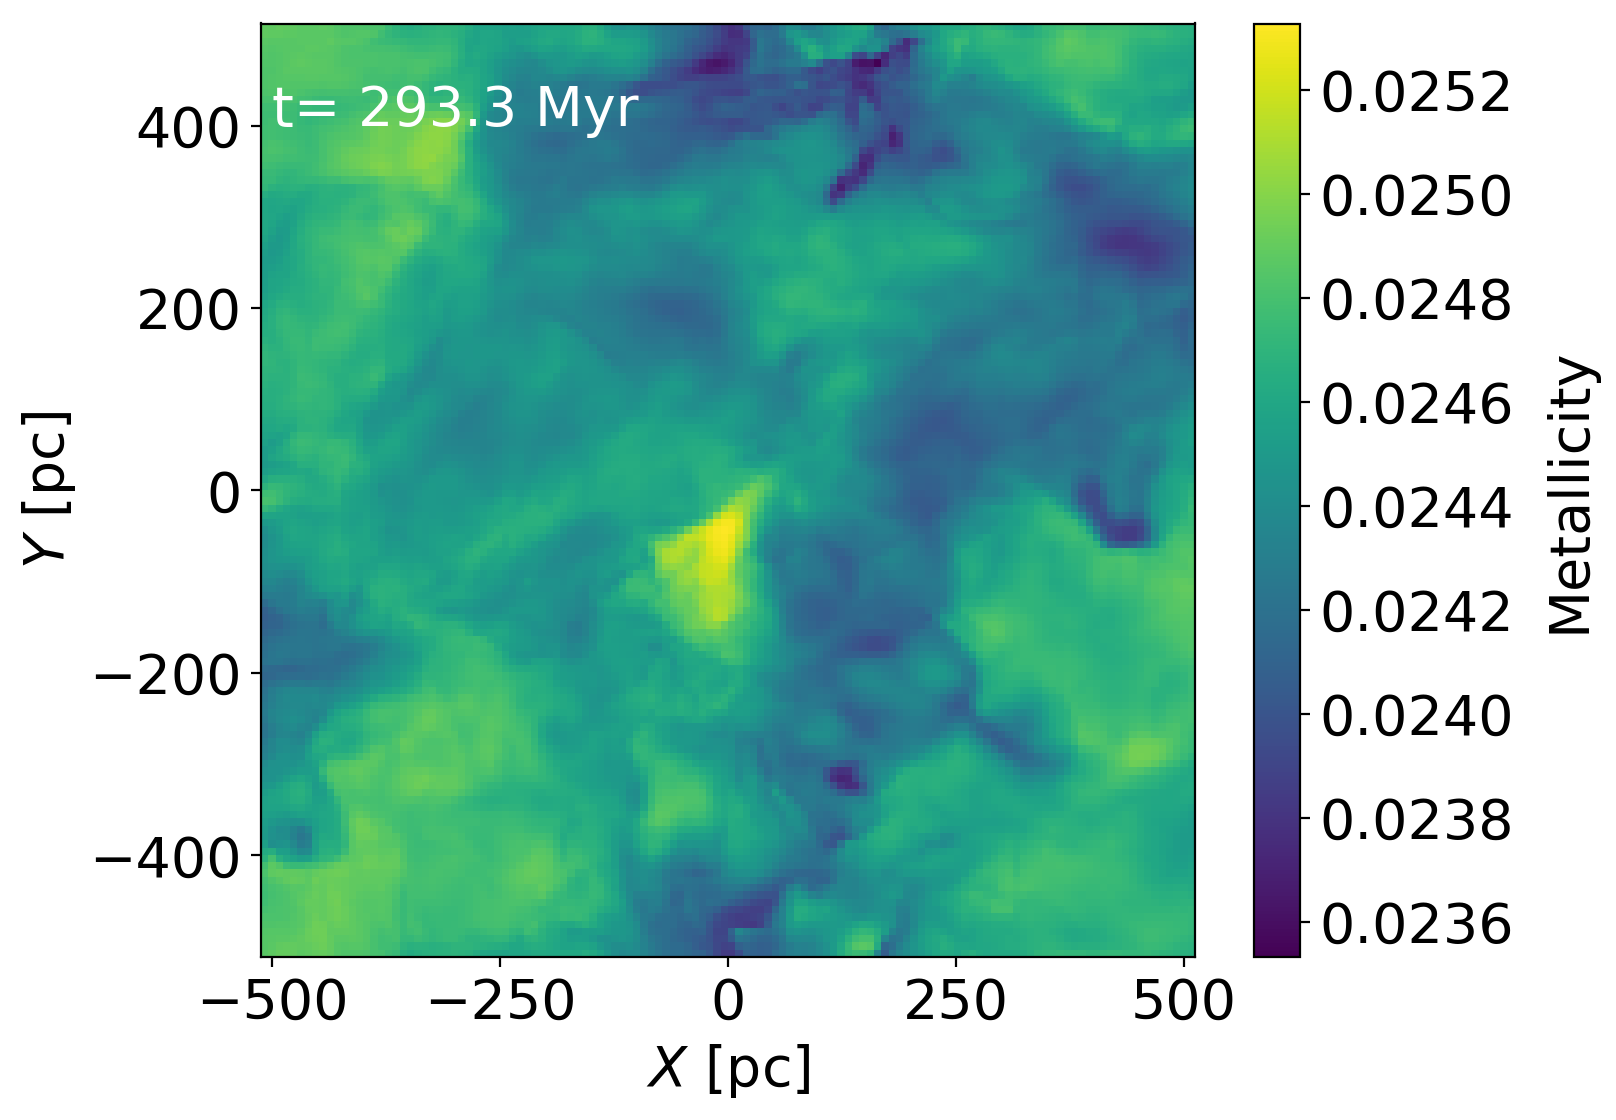

In [106]:
### Plotting Gas plot

###plt.subplot(121)
plt.figure(figsize = (8,6))
plt.text(-500,400,'{} {} {}'.format('t=',round(Z['time'],1),"Myr"),color='w')
plt.imshow(Zxy_data,extent=Zxy_bounds)
plt.set_cmap('viridis')
plt.xlabel("$X$ [pc]")
plt.ylabel("$Y$ [pc]")
###plt.clim(0.02,0.03)
cbar = plt.colorbar()
cbar.set_label('Metallicity', rotation=-270, labelpad = 10)
plt.tight_layout()

'''
plt.axes()

circle = plt.Circle((-250, 0), radius=250, fc='none', edgecolor = 'w')
plt.gca().add_patch(circle)

plt.axis('scaled')
'''
'''
fig, ax = plt.subplots()
xfixdata, yfixdata = -250,0
xdata, ydata = -250,100
ln, = plt.plot([], [], 'ro-', animated=True)
plt.plot([xfixdata], [yfixdata], 'bo', ms=10)

def init():
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 15)
    return ln,

def update(frame):
    ydata = list_var_points[frame]
    ln.set_data([xfixdata,xdata], [yfixdata,ydata])
    return ln,          


ani = FuncAnimation(fig, update, frames=range(15), init_func=init, blit=True)
plt.show()
'''



plt.savefig("./ProjectPlot.png",bbox_inches = "tight")

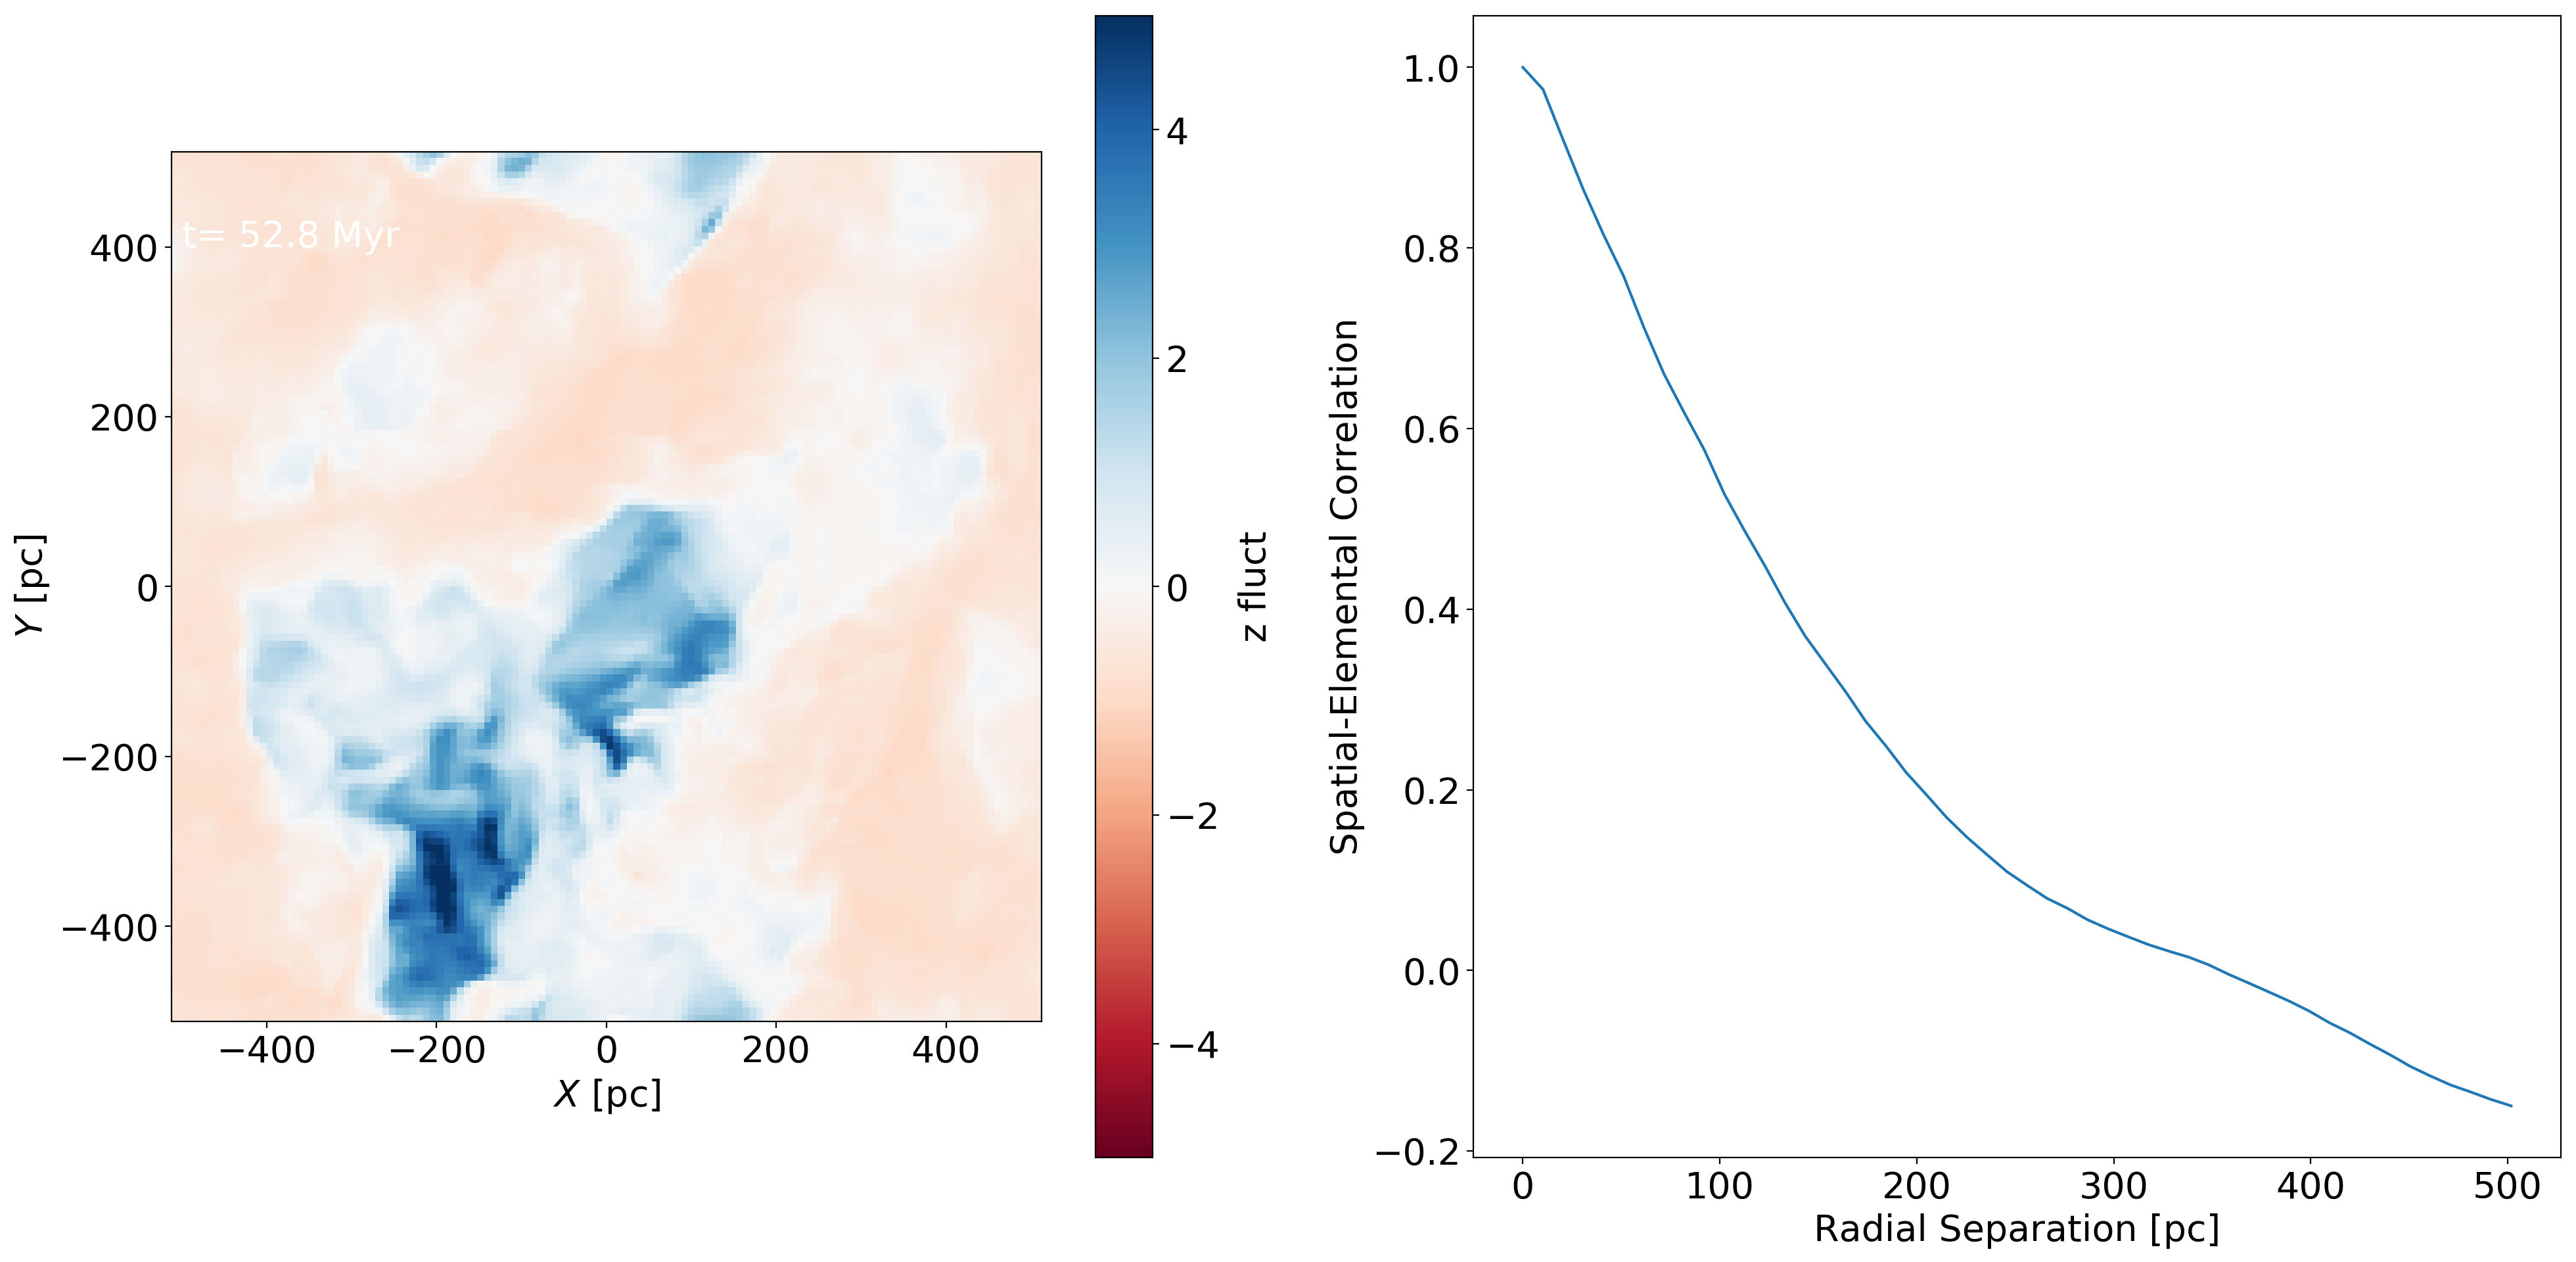

In [21]:
### Plotting the STD and 2Point


plt.subplot(121)
plt.text(-500,400,'{} {} {}'.format('t=',round(Z['time'],1),"Myr"),color='w')
plt.imshow(Z_Fluct,extent=Zxy_bounds)
plt.set_cmap('RdBu')
plt.xlabel("$X$ [pc]")
plt.ylabel("$Y$ [pc]")
plt.clim(-5,5)
cbar = plt.colorbar()
cbar.set_label('z fluct', rotation=-270, labelpad = 10)
plt.subplot(122)
plt.xlabel("Radial Separation [pc]")
plt.ylabel("Spatial-Elemental Correlation")
plt.plot(r,tp_2d.mean(axis=1))
plt.tight_layout()
plt.savefig("Plots/plot.png")

In [16]:
Lx = Zxy_bounds[1]-Zxy_bounds[0]
print Lx
Nr = 50
print Nr
rMax = Lx/2
print rMax
rindex = np.arange(Nr)
print rindex
dr = rMax/Nr
print dr
r = rindex * dr
print r  ##x-axis

1024.0
50
512.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
10.24
[  0.    10.24  20.48  30.72  40.96  51.2   61.44  71.68  81.92  92.16
 102.4  112.64 122.88 133.12 143.36 153.6  163.84 174.08 184.32 194.56
 204.8  215.04 225.28 235.52 245.76 256.   266.24 276.48 286.72 296.96
 307.2  317.44 327.68 337.92 348.16 358.4  368.64 378.88 389.12 399.36
 409.6  419.84 430.08 440.32 450.56 460.8  471.04 481.28 491.52 501.76]


In [17]:
Var = np.var(Zxy_data)
print Var
Std = np.std(Zxy_data)
print Std

7.517987387691771e-07
0.0008670632841777912


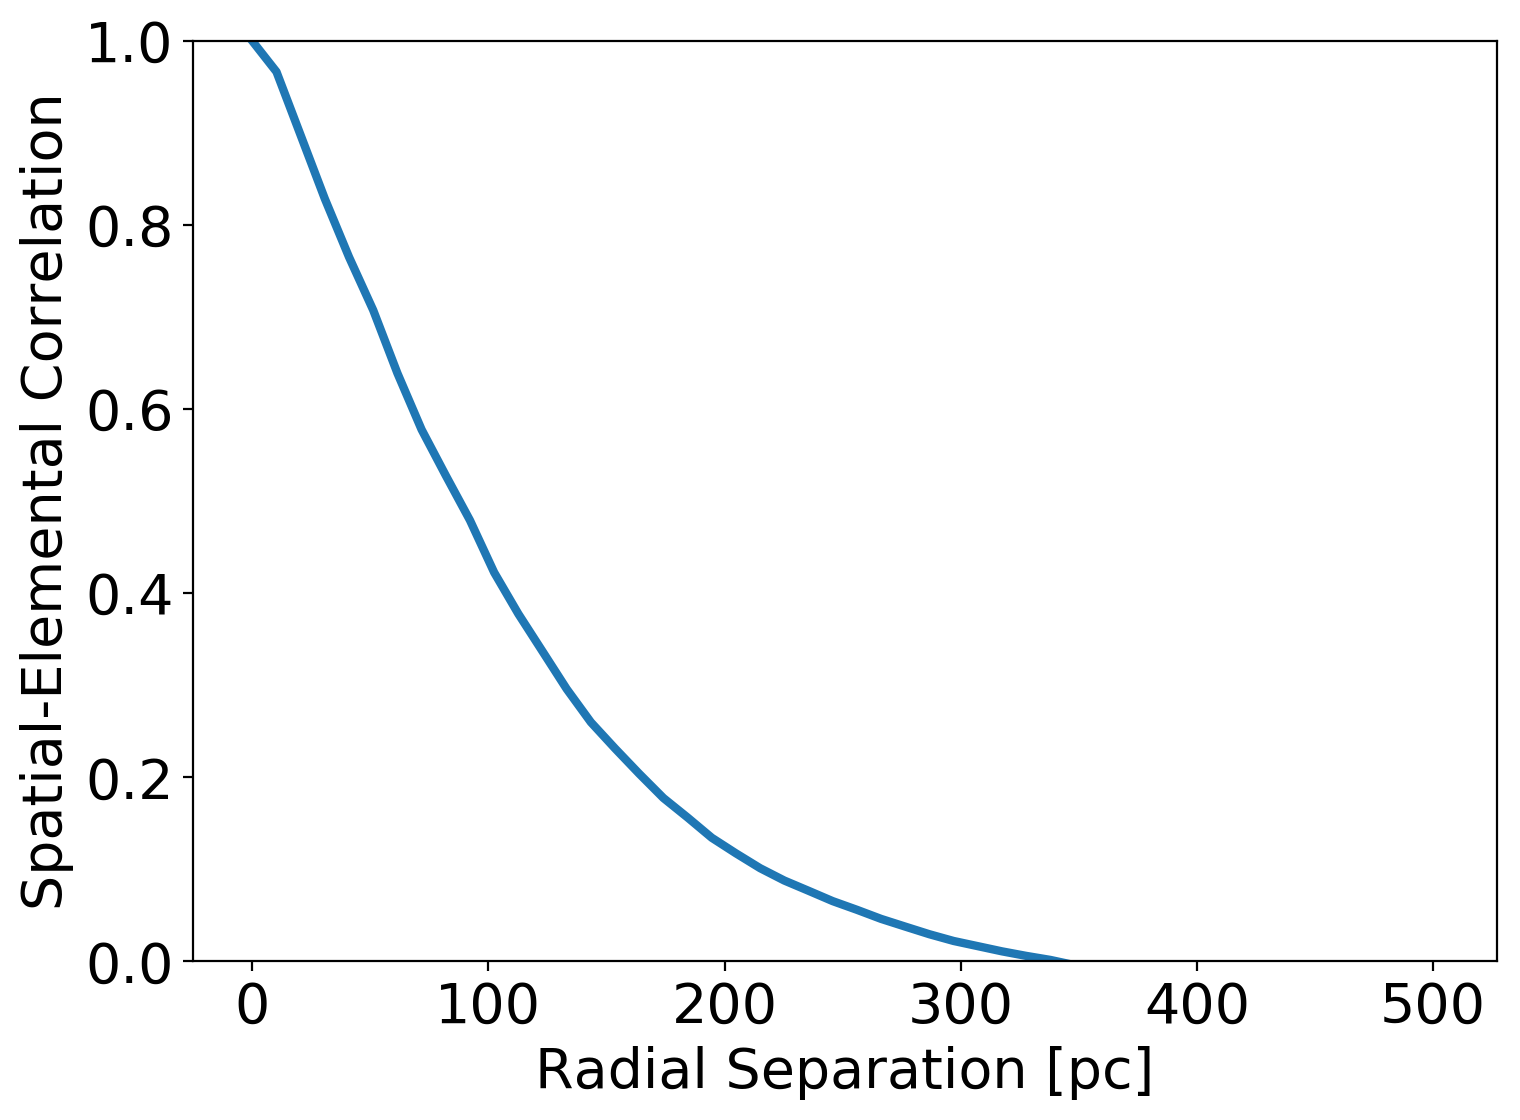

In [105]:
plt.figure(figsize = (8,6))
plt.plot(r,tp_2d.mean(axis=1),lw=3)
plt.xlabel("Radial Separation [pc]")
plt.ylabel("Spatial-Elemental Correlation")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("Plots/2PointPlot.png",bbox_inches='tight')

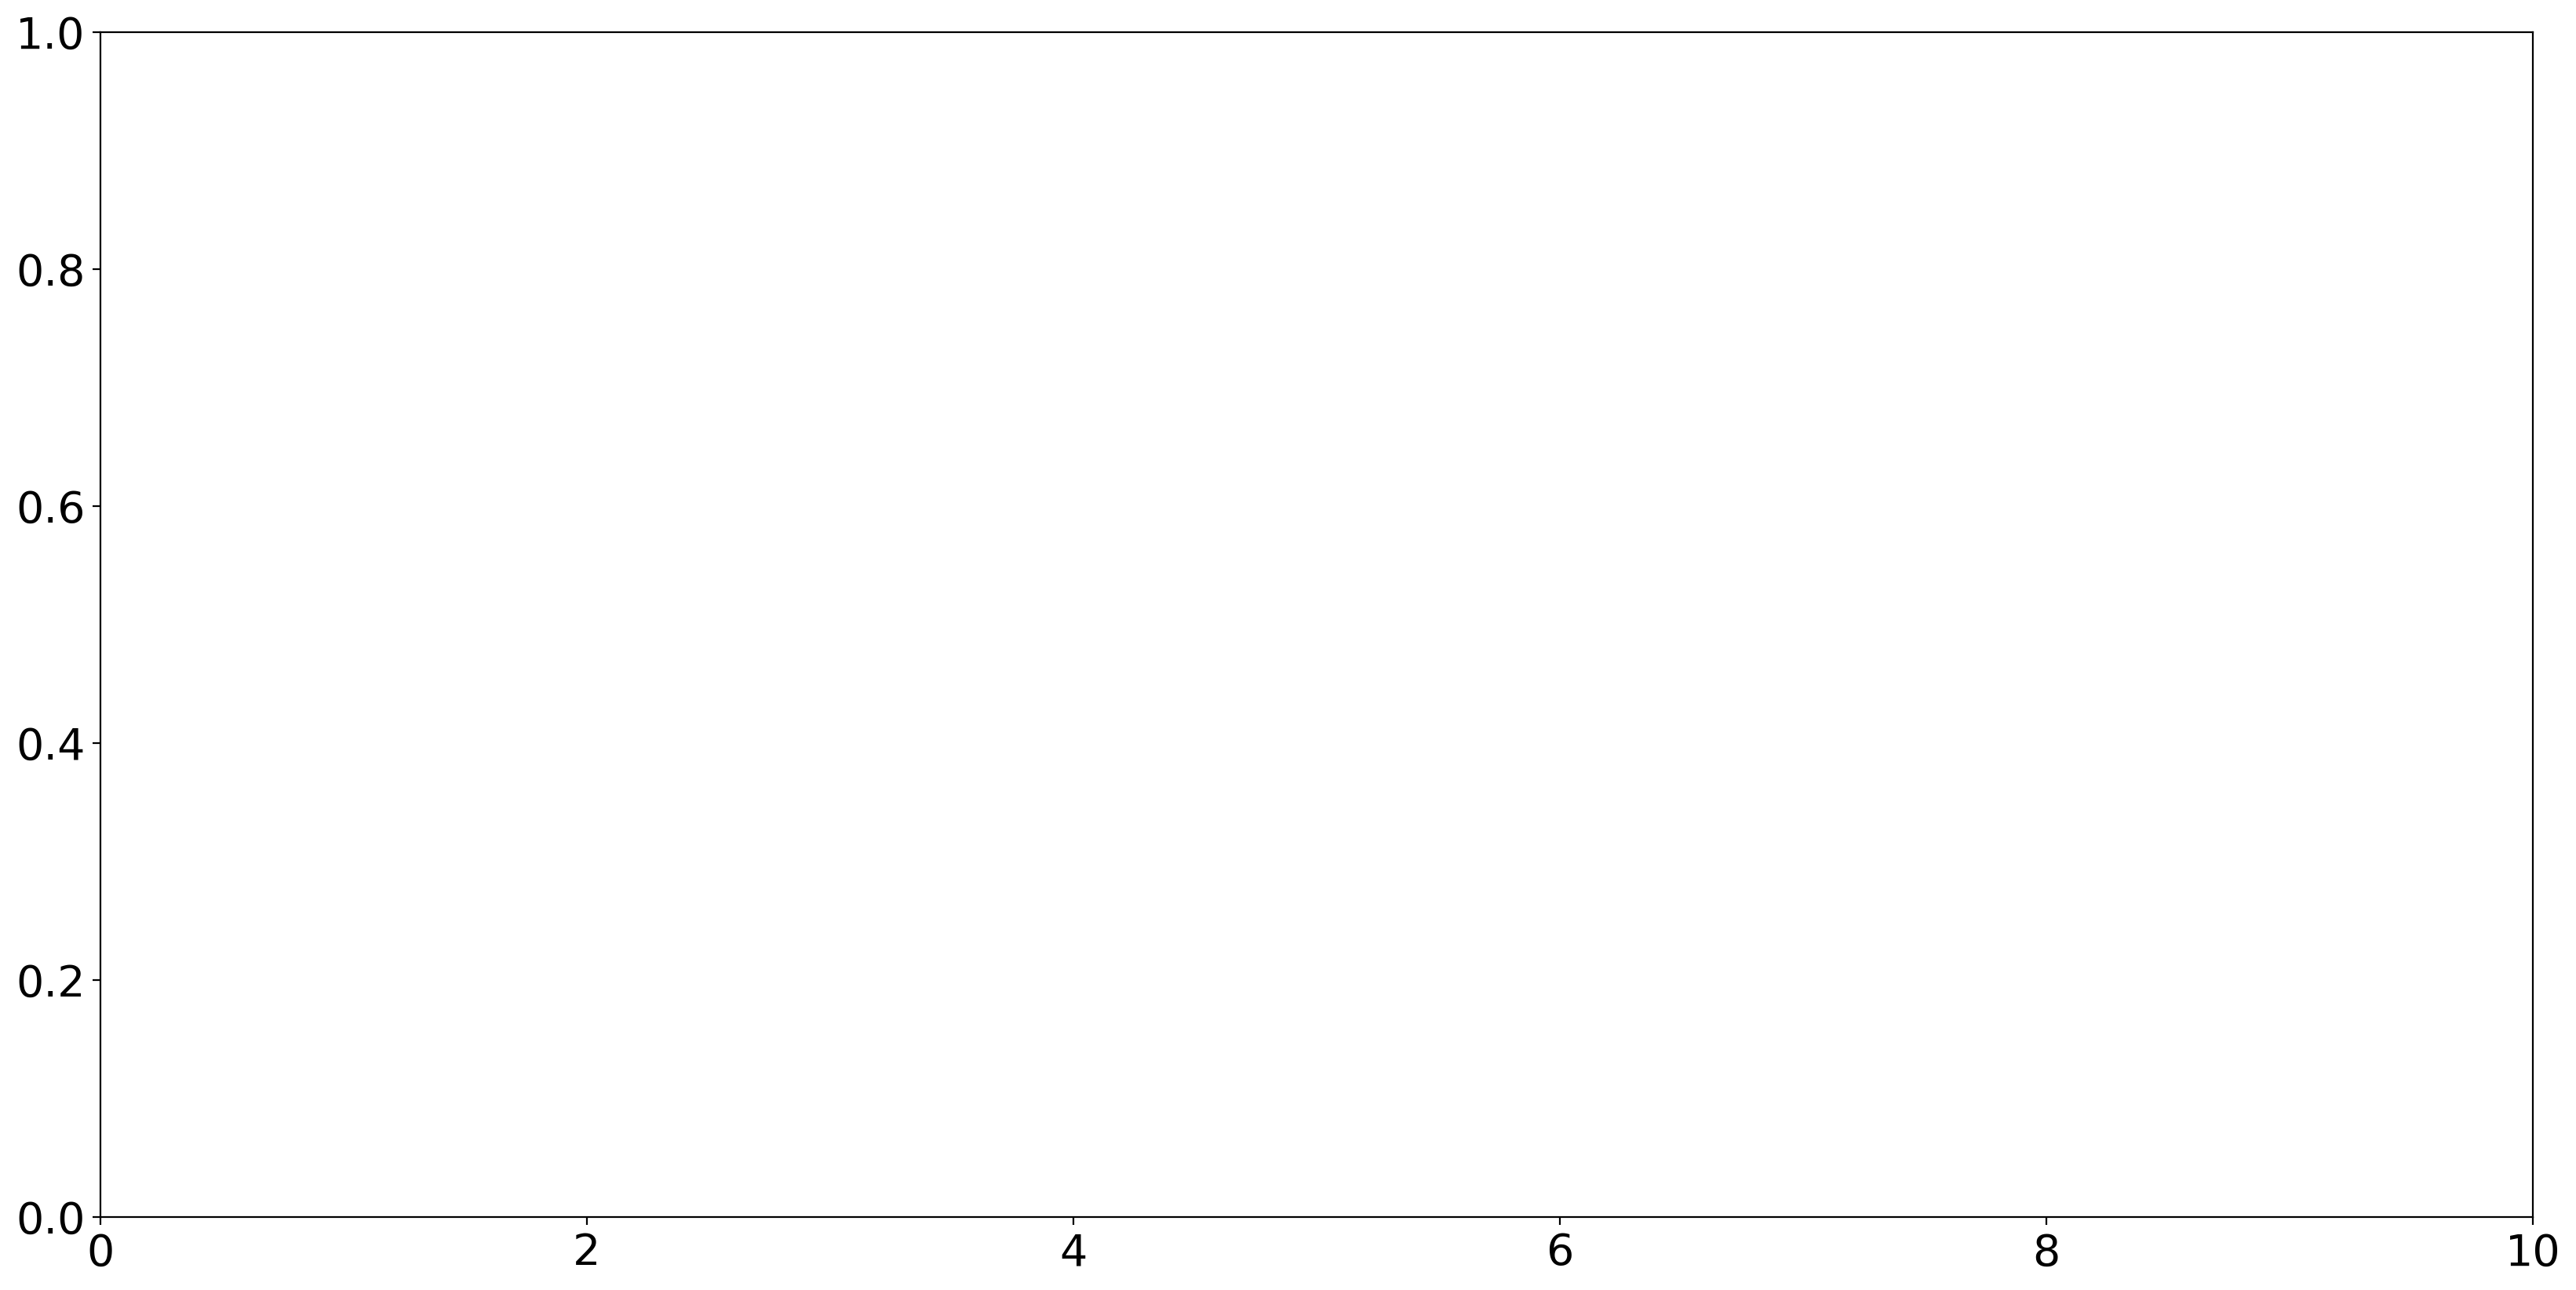

In [94]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)